In [121]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from sideinfo_release import *

In [164]:

    
def get_network_new(num_layers = 10, node_size = 10, dim = 1, scale = 1, cuda = False):
    
    
    class Model(nn.Module):
        def __init__(self, num_layers, node_size, dim, scale):
            super(Model, self).__init__()
            l = []
            l.append(nn.Linear(dim,node_size))
            l.append(nn.LeakyReLU(0.1))
            for i in range(num_layers - 2):
                l.append(nn.Linear(node_size,node_size))
                l.append(nn.LeakyReLU(0.1))

            l.append(nn.Linear(node_size,1))
            
            self.scale = scale
            self.layers = nn.Sequential(*l)


        def forward(self, x):
            x = self.layers(x)
            x = torch.mul(torch.exp(x) , self.scale)
            
            return x


    network = Model(num_layers, node_size, dim, scale)
    if cuda:
        return network.cuda()
    else:
        return network    

In [165]:
fn = 'data/gtex_filtered2.csv'
dim = 2
data = np.loadtxt(open(fn, "rb"), delimiter=",", skiprows=1)
x = data[:,0:dim]
p = data[:,dim]
h = data[:,dim+1]
n_samples = len(x)

In [166]:
network = get_network_new(cuda=True, scale = 0.00027629599999999999)
network.load_state_dict(torch.load('data/gtex_dim0.th'))

In [167]:
x_prob = Variable(torch.from_numpy(np.arange(np.min(x[:,0]), np.max(x[:,0]), 0.01).astype(np.float32))).cuda().view(1530,1)

In [168]:
x_prob_np = x_prob.cpu().data.numpy()
threshold = network(x_prob).cpu().data.numpy() 

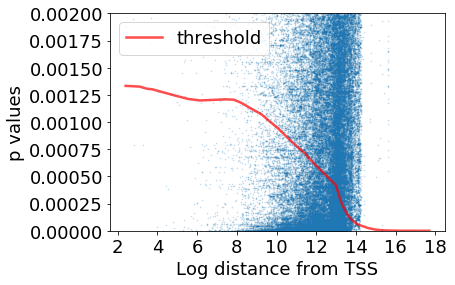

In [172]:
plt.plot(x_prob_np, threshold, 'r', linewidth = 2.5, label = 'threshold', alpha = 0.7)
plt.legend(fontsize=18)
plt.scatter(x[:,0], p, 0.5, alpha = 0.2)
plt.ylim(0,0.002)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Log distance from TSS', fontsize=18)
plt.ylabel('p values', fontsize=18)
plt.savefig('gtex-distance.png', pad_inches=2, bbox_inches='tight', dpi = 300)

In [173]:
network.load_state_dict(torch.load('data/gtex_dim1.th'))

In [174]:
x_prob = Variable(torch.from_numpy(np.arange(np.min(x[:,1]), np.max(x[:,1]), 0.01).astype(np.float32))).cuda().view(726,1)

In [177]:
x_prob_np = x_prob.cpu().data.numpy()
threshold = network(x_prob).cpu().data.numpy() 

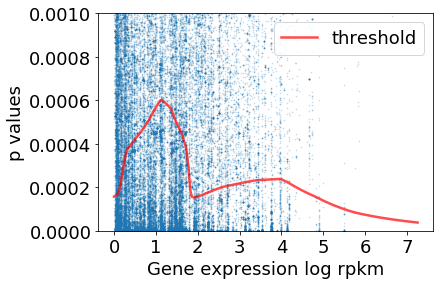

In [179]:
plt.plot(x_prob_np, threshold, 'r', linewidth = 2.5,  label = 'threshold', alpha = .7)
plt.legend(fontsize=18)
plt.scatter(x[:,1], p, 0.5, alpha = 0.2)
plt.ylim(0,0.001)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Gene expression log rpkm', fontsize=18)
plt.ylabel('p values', fontsize=18)
plt.savefig('gtex-expression.png', pad_inches=2, bbox_inches='tight', dpi = 300)

In [140]:
fn = 'data/data_airway.csv'
dim = 1
data = np.loadtxt(open(fn, "rb"), delimiter=",", skiprows=1)
x = data[:,0:dim]
p = data[:,dim]
h = data[:,dim+1]
n_samples = len(x)

In [141]:
network.load_state_dict(torch.load('data/airway.th'))

In [142]:
x_prob = Variable(torch.from_numpy(np.arange(np.min(x[:]), np.max(x[:]), 0.01).astype(np.float32))).cuda().unsqueeze(1)

In [143]:
x_prob_np = x_prob.cpu().data.numpy()
threshold = network(x_prob).cpu().data.numpy()

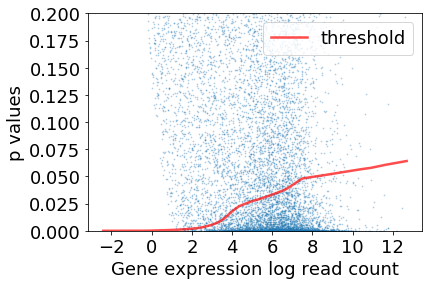

In [144]:
plt.plot(x_prob_np, threshold, 'r', label = 'threshold', linewidth = 2.5, alpha = .7)
plt.legend(fontsize=18)
plt.scatter(x, p, 0.5, alpha = 0.3)
plt.ylim(0,0.2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Gene expression log read count', fontsize=18)
plt.ylabel('p values', fontsize=18)
plt.savefig('airway.png', pad_inches=2, bbox_inches='tight', dpi = 300)

In [49]:
len(x)

33469

In [145]:
fn = 'data/gtex_filtered3d.csv'
dim = 3
data = np.loadtxt(open(fn, "rb"), delimiter=",", skiprows=1)
x = data[:,0:dim]
p = data[:,dim]
h = data[:,dim+1]
n_samples = len(x)

In [158]:
network = get_network_new(cuda=True, scale = 0.00027629599999999999)
network.load_state_dict(torch.load('data/gtex_dim2.th'))
x_prob = Variable(torch.from_numpy(np.arange(np.min(x[:,2]), np.max(x[:,2]), 0.001).astype(np.float32))).cuda().unsqueeze(1)

In [159]:
x_prob_np = x_prob.cpu().data.numpy()
threshold = network(x_prob).cpu().data.numpy() 

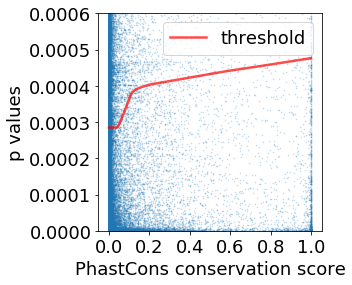

In [163]:
plt.figure(figsize=(4,4))
plt.plot(x_prob_np, threshold, 'r', linewidth = 2.5,  label = 'threshold', alpha = .7)
plt.legend(fontsize=18)
plt.scatter(x[:,2], p, 0.5, alpha = 0.2)
plt.ylim(0,0.0006)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('PhastCons conservation score', fontsize=18)
plt.ylabel('p values', fontsize=18)
plt.savefig('gtex-conservation.png', pad_inches=2, bbox_inches='tight', dpi = 300)

In [161]:
threshold

array([[ 0.00028514],
       [ 0.00028513],
       [ 0.00028512],
       [ 0.00028511],
       [ 0.0002851 ],
       [ 0.00028509],
       [ 0.00028508],
       [ 0.00028507],
       [ 0.00028506],
       [ 0.00028505],
       [ 0.00028505],
       [ 0.00028503],
       [ 0.00028501],
       [ 0.00028501],
       [ 0.000285  ],
       [ 0.000285  ],
       [ 0.000285  ],
       [ 0.00028499],
       [ 0.00028499],
       [ 0.00028499],
       [ 0.00028498],
       [ 0.00028498],
       [ 0.00028497],
       [ 0.00028497],
       [ 0.00028497],
       [ 0.00028496],
       [ 0.00028496],
       [ 0.00028495],
       [ 0.00028495],
       [ 0.00028495],
       [ 0.00028494],
       [ 0.00028494],
       [ 0.00028493],
       [ 0.00028493],
       [ 0.00028494],
       [ 0.00028495],
       [ 0.00028496],
       [ 0.00028501],
       [ 0.00028508],
       [ 0.00028515],
       [ 0.00028522],
       [ 0.00028529],
       [ 0.00028578],
       [ 0.00028629],
       [ 0.0002871 ],
       [ 0